In [37]:
import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

warnings.filterwarnings('ignore')

In [3]:
api_key = '4eda5e3af511b6d4892332948b84476c'

In [4]:
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(205, api_key)
data_205 = requests.get(url).json()

In [9]:
vervar_df = pd.DataFrame(data_205['vervar'])
turvar_df = pd.DataFrame(data_205['turvar'])
tahun_df = pd.DataFrame(data_205['tahun'])
content_df = pd.DataFrame(data={'id': data_205['datacontent'].keys(), 'values': data_205['datacontent'].values() })

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[:4].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(turvar_df, how='left', left_on = content_df_1['id'].str[7:10].astype('int64'), right_on = 'val') 
content_df_3 = content_df_2.merge(tahun_df, how='left', left_on = content_df_2['id'].str[10:13].astype('int64'), right_on = 'val') 

data_205_df = content_df_3[['id', 'values', 'label_x', 'label_y', 'label']]
data_205_df.columns = ['id', 'values', 'area', 'breakdown', 'year']

data_205_df['data_title'] =  data_205['var'][0]['label']


# Test Looping to create new variable

In [11]:
edu_var_id = [301,  303,  304, 1339, 1342, 1343, 1417, 1419, 1421,
       1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1439,
       1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450,
       1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461,
       1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1526, 1527, 1607,
       1608, 1794, 1796, 1797, 1798, 1799, 1980, 1981, 1982, 1983, 1984,
       1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000]

In [19]:
new_id_list = []
df_name_list = []
for i in edu_var_id:
    new_id_list.append('data_' + str(i))

for j in new_id_list:
    df_name_list.append(str(j)+'_df')

# Explore

In [138]:
def extract_data_all(var_id):
    url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(var_id, api_key)
    data_temp = requests.get(url).json()

    vervar_df = pd.DataFrame(data_temp['vervar'])
    turvar_df = pd.DataFrame(data_temp['turvar'])
    tahun_df = pd.DataFrame(data_temp['tahun'])
    content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values() })

    content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[:4].astype('int64'), right_on = 'val')
    content_df_2 = content_df_1.merge(turvar_df, how='left', left_on = content_df_1['id'].str[7:10].astype('int64'), right_on = 'val') 
    content_df_3 = content_df_2.merge(tahun_df, how='left', left_on = content_df_2['id'].str[10:13].astype('int64'), right_on = 'val') 

    temp_df = content_df_3[['id', 'values', 'label_x', 'label_y', 'label']]
    temp_df.columns = ['id', 'values', 'area', 'breakdown', 'year']

    temp_df['data_title'] =  data_temp['var'][0]['label']

    return temp_df.to_csv('{}.csv'.format('edu_'+str(var_id)), index=False)


## 102

In [29]:
data_102 = extract_data_all(102)
data_102.head()

,id,values,area,age_breakdown,year,data_title
0,99991022321030,10.21,INDONESIA,15+,2003,Persentase Penduduk Buta Huruf
1,99991022321040,9.62,INDONESIA,15+,2004,Persentase Penduduk Buta Huruf
2,99991022321050,9.09,INDONESIA,15+,2005,Persentase Penduduk Buta Huruf
3,99991022321060,8.55,INDONESIA,15+,2006,Persentase Penduduk Buta Huruf
4,99991022321070,8.13,INDONESIA,15+,2007,Persentase Penduduk Buta Huruf


In [68]:
data_102_2021_15 = data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '15+')]['values']
data_102_2021_1544 = data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '15-44')]['values']
data_102_2021_45 = data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '45+')]['values']

data_102_2021_15_np = np.array(data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '15+')]['values'])
data_102_2021_1544_np = np.array(data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '15-44')]['values'])
data_102_2021_45_np = np.array(data_102.loc[(data_102['year'] == '2021') & (data_102['age_breakdown'] == '45+')]['values'])

In [53]:
i = 0
bar_list = []
for i in range(35):
    bar_list.append(i)

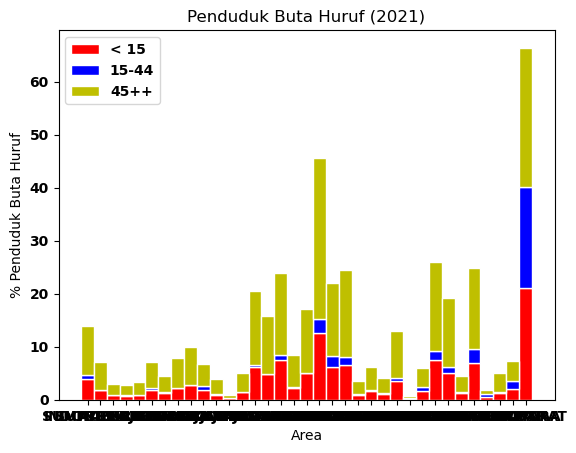

In [69]:
# Names of group and bar width
names = data_102['area'].unique()
barWidth = 1

plt.bar(names, data_102_2021_15_np, color='r', edgecolor='white', width=barWidth)
plt.bar(names, data_102_2021_1544_np, bottom=data_102_2021_15_np, color='b', edgecolor='white', width=barWidth)
plt.bar(names, data_102_2021_45_np, bottom=data_102_2021_15_np+data_102_2021_1544_np, color='y', edgecolor='white', width=barWidth)
plt.xlabel("Area")
plt.ylabel("% Penduduk Buta Huruf")
plt.legend(["< 15", "15-44", "45++"])
plt.title("Penduduk Buta Huruf (2021)")
plt.show()

nevermind, let's just use tableau

In [70]:
data_102.to_csv('data_102.csv', index=False)

## 205

In [73]:
data_205 = extract_data_all(205)
data_205.head()

,id,values,area,age_breakdown,year,data_title
0,99992054411030,61566,INDONESIA,SD,2003,Jumlah Desa yang Memiliki Fasilitas Sekolah Me...
1,99992054411050,62658,INDONESIA,SD,2005,Jumlah Desa yang Memiliki Fasilitas Sekolah Me...
2,99992054411080,66627,INDONESIA,SD,2008,Jumlah Desa yang Memiliki Fasilitas Sekolah Me...
3,99992054411110,68350,INDONESIA,SD,2011,Jumlah Desa yang Memiliki Fasilitas Sekolah Me...
4,99992054411140,71205,INDONESIA,SD,2014,Jumlah Desa yang Memiliki Fasilitas Sekolah Me...


In [75]:
data_205.to_csv('edu_205.csv', index=False)

## 301

In [78]:
data_301 = extract_data_all(301)
data_301.head()

,id,values,area,breakdown,year,data_title
0,99993015351030,96.42,INDONESIA,7-12,2003,Angka Partisipasi Sekolah ( A P S )
1,99993015351040,96.77,INDONESIA,7-12,2004,Angka Partisipasi Sekolah ( A P S )
2,99993015351050,97.14,INDONESIA,7-12,2005,Angka Partisipasi Sekolah ( A P S )
3,99993015351060,97.39,INDONESIA,7-12,2006,Angka Partisipasi Sekolah ( A P S )
4,99993015351070,97.64,INDONESIA,7-12,2007,Angka Partisipasi Sekolah ( A P S )


In [79]:
data_301.to_csv('edu_301.csv', index=False)

## 303

In [81]:
data_303 = extract_data_all(303)
data_303.head()

,id,values,area,breakdown,year,data_title
0,99993035391030,105.80,INDONESIA,SD/MI/Paket A,2003,Angka Partisipasi Kasar ( A P K )
1,99993035391040,107.13,INDONESIA,SD/MI/Paket A,2004,Angka Partisipasi Kasar ( A P K )
2,99993035391050,106.63,INDONESIA,SD/MI/Paket A,2005,Angka Partisipasi Kasar ( A P K )
3,99993035391060,109.96,INDONESIA,SD/MI/Paket A,2006,Angka Partisipasi Kasar ( A P K )
4,99993035391070,112.19,INDONESIA,SD/MI/Paket A,2007,Angka Partisipasi Kasar ( A P K )


In [82]:
data_303.to_csv('edu_303.csv', index=False)

## 304

In [107]:
data_304 = extract_data_all(304)
data_304.head()

,id,values,area,breakdown,year,data_title
0,99993045391030,92.55,INDONESIA,SD/MI/Paket A,2003,Angka Partisipasi Murni ( A P M )
1,99993045391040,93.04,INDONESIA,SD/MI/Paket A,2004,Angka Partisipasi Murni ( A P M )
2,99993045391050,93.25,INDONESIA,SD/MI/Paket A,2005,Angka Partisipasi Murni ( A P M )
3,99993045391060,93.54,INDONESIA,SD/MI/Paket A,2006,Angka Partisipasi Murni ( A P M )
4,99993045391070,93.78,INDONESIA,SD/MI/Paket A,2007,Angka Partisipasi Murni ( A P M )


In [108]:
data_304.to_csv('edu_304.csv', index=False)

## 1339

In [106]:
# specific for 1339
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(1339, api_key)
data_temp = requests.get(url).json()

vervar_df = pd.DataFrame(data_temp['vervar'])
tahun_df = pd.DataFrame(data_temp['tahun'])
content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

data_1339 = content_df_2[['id', 'values', 'label_x', 'label_y']]
data_1339.columns = ['id', 'values', 'gender', 'year']

data_1339['data_title'] =  data_temp['var'][0]['label']

data_1339.to_csv('edu_1339.csv', index=False)

# 1342

In [111]:
# specific for 1342
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(1342, api_key)
data_temp = requests.get(url).json()

vervar_df = pd.DataFrame(data_temp['vervar'])
tahun_df = pd.DataFrame(data_temp['tahun'])
content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

data_1342 = content_df_2[['id', 'values', 'label_x', 'label_y']]
data_1342.columns = ['id', 'values', 'gender', 'year']

data_1342['data_title'] =  data_temp['var'][0]['label']

data_1342.to_csv('edu_1342.csv', index=False)

# 1343

In [114]:
# specific for 1343
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(1343, api_key)
data_temp = requests.get(url).json()

vervar_df = pd.DataFrame(data_temp['vervar'])
tahun_df = pd.DataFrame(data_temp['tahun'])
content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

data_1343 = content_df_2[['id', 'values', 'label_x', 'label_y']]
data_1343.columns = ['id', 'values', 'gender', 'year']

data_1343['data_title'] =  data_temp['var'][0]['label']

data_1343.to_csv('edu_1343.csv', index=False)

# 1423

In [117]:
# specific for 1423
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(1423, api_key)
data_temp = requests.get(url).json()

vervar_df = pd.DataFrame(data_temp['vervar'])
tahun_df = pd.DataFrame(data_temp['tahun'])
content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

data_1423 = content_df_2[['id', 'values', 'label_x', 'label_y']]
data_1423.columns = ['id', 'values', 'gender', 'year']

data_1423['data_title'] =  data_temp['var'][0]['label']

data_1423.to_csv('edu_1423.csv', index=False)

# 1424

In [119]:
# specific for 1424
url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(1424, api_key)
data_temp = requests.get(url).json()

vervar_df = pd.DataFrame(data_temp['vervar'])
tahun_df = pd.DataFrame(data_temp['tahun'])
content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

data_1424 = content_df_2[['id', 'values', 'label_x', 'label_y']]
data_1424.columns = ['id', 'values', 'gender', 'year']

data_1424['data_title'] =  data_temp['var'][0]['label']

data_1424.to_csv('edu_1423.csv', index=False)

In [126]:
def extract_data_ver_tahun(var_id):
    url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(var_id, api_key)
    data_temp = requests.get(url).json()

    vervar_df = pd.DataFrame(data_temp['vervar'])
    tahun_df = pd.DataFrame(data_temp['tahun'])
    content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values()})

    content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
    content_df_2 = content_df_1.merge(tahun_df, how='left', left_on = content_df_1['id'].str[-4:-1].astype('int64'), right_on = 'val') 

    temp_df = content_df_2[['id', 'values', 'label_x', 'label_y']]
    temp_df.columns = ['id', 'values', 'gender', 'year']

    temp_df['data_title'] =  data_temp['var'][0]['label']

    return temp_df.to_csv('{}.csv'.format('edu_'+str(var_id)), index=False)

# 1425 - 1608 (Angka partisipasi)

In [127]:
extract_data_ver_tahun(1425)

In [156]:
ap_list_2var = [1426, 1427,
       1428, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446]

ap_list_3var_apm = [1455, 1456, 1607, 1608]
ap_list_3var_apk = [1457, 1526, 1527]

In [155]:
def extract_data_3var_apm(var_id):
    url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(var_id, api_key)
    data_temp = requests.get(url).json()

    vervar_df = pd.DataFrame(data_temp['vervar'])
    turvar_df = pd.DataFrame(data_temp['turvar'])
    tahun_df = pd.DataFrame(data_temp['tahun'])
    content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values() })

    content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[:4].astype('int64'), right_on = 'val')
    content_df_2 = content_df_1.merge(turvar_df, how='left', left_on = content_df_1['id'].str[8:12].astype('int64'), right_on = 'val') 
    content_df_3 = content_df_2.merge(tahun_df, how='left', left_on = content_df_2['id'].str[12:15].astype('int64'), right_on = 'val') 

    temp_df = content_df_3[['id', 'values', 'label_x', 'label_y', 'label']]
    temp_df.columns = ['id', 'values', 'area', 'breakdown', 'year']

    temp_df['data_title'] =  data_temp['var'][0]['label']

    return temp_df.to_csv('{}.csv'.format('edu_'+str(var_id)), index=False)


def extract_data_3var_apk(var_id):
    url = 'https://webapi.bps.go.id/v1/api/list/model/data/domain/0000/var/{0}/key/{1}/'.format(var_id, api_key)
    data_temp = requests.get(url).json()

    vervar_df = pd.DataFrame(data_temp['vervar'])
    turvar_df = pd.DataFrame(data_temp['turvar'])
    tahun_df = pd.DataFrame(data_temp['tahun'])
    content_df = pd.DataFrame(data={'id': data_temp['datacontent'].keys(), 'values': data_temp['datacontent'].values() })

    content_df_1 = content_df.merge(vervar_df, how='left', left_on = content_df['id'].str[0].astype('int64'), right_on = 'val')
    content_df_2 = content_df_1.merge(turvar_df, how='left', left_on = content_df_1['id'].str[6:9].astype('int64'), right_on = 'val') 

    temp_df = content_df_2[['id', 'values', 'label_x', 'label_y']]
    temp_df.columns = ['id', 'values', 'breakdown', 'year']

    temp_df['data_title'] =  data_temp['var'][0]['label']

    return temp_df.to_csv('{}.csv'.format('edu_'+str(var_id)), index=False)


In [157]:
for i in ap_list_3var_apm:
    extract_data_3var_apm(i)

for i in ap_list_3var_apk:
    extract_data_3var_apk(i)

Angka partisipasi is done for now (might need to check the data format later)

# 1794 - 1798
2 variable, can use extract_data_3var_apk

In [160]:
proporsi_list = [1794, 1796, 1797, 1798]

for i in proporsi_list:
    extract_data_3var_apk(i)

In [178]:
rest_2list = [1799, 1992, 1994, 1996, 1998, 2000]
rest_3list = [1980, 1981, 1982, 1983, 1984, 1986,
       1988, 1990]

for i in rest_2list:
    extract_data_3var_apk(i)

for i in rest_3list:
    extract_data_3var_apm(i)

Done! Though really need to check whether the data structure is correctly extracted or not